In [1]:
import pandas as pd

In [3]:
iris=pd.read_excel('Data/Iris.xls')

In [5]:
#predict petallength from petalwidth
inputs=iris[['petalwidth']]
outputs=iris[['petallength']]

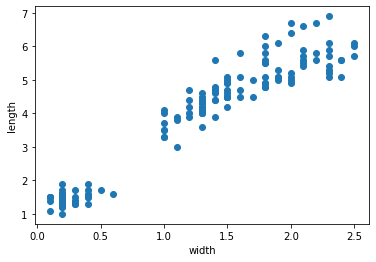

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs)
plt.xlabel('width')
plt.ylabel('length')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
x_train, x_test, y_train, y_test=train_test_split(inputs, outputs, test_size=0.2, random_state=42)

In [25]:
from sklearn.metrics import mean_squared_error

In [15]:
lst_k=[]
lst_acc=[]
for k in range(1, int(y_train.shape[0]**0.5)):
    lst_k.append(k)
    kn_re=KNeighborsRegressor(n_neighbors=k)
    kn_re.fit(x_train, y_train)
    y_pred=kn_re.predict(x_test)
    acc=kn_re.score(x_test, y_test)
    lst_acc.append(acc)
    print('k: %d -> acc: %0.4f' %(k,acc))    

k: 1 -> acc: 0.9103
k: 2 -> acc: 0.9262
k: 3 -> acc: 0.9403
k: 4 -> acc: 0.9427
k: 5 -> acc: 0.9464
k: 6 -> acc: 0.9500
k: 7 -> acc: 0.9485
k: 8 -> acc: 0.9482
k: 9 -> acc: 0.9486


In [18]:
vitri=lst_acc.index(max(lst_acc))
k=lst_k[vitri]
k, lst_acc[vitri]

(6, 0.9499968922866554)

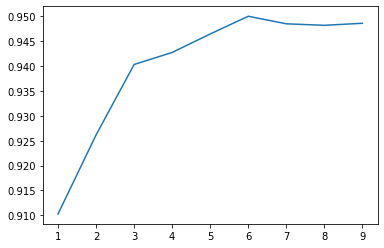

In [20]:
plt.plot(lst_k,lst_acc)
plt.show()

In [21]:
#choosing k=6
model=KNeighborsRegressor(n_neighbors=6)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [23]:
model.score(x_train, y_train)

0.9581011061128362

In [24]:
model.score(x_test, y_test)

0.9499968922866554

In [26]:
mean_squared_error(y_test, y_pred)

0.16387962962962974

In [32]:
#listing redult
df=pd.DataFrame({'Actual':pd.DataFrame(y_test.values)[0].values, 'Predict':pd.DataFrame(y_pred)[0]})
df.head(10)

,Actual,Predict
0,4.7,3.900000
1,1.7,1.366667
2,6.9,5.716667
3,4.5,4.633333
4,4.8,4.600000
5,1.5,1.600000
6,3.6,4.166667
7,5.1,5.716667
8,4.5,4.633333
9,3.9,3.900000


In [33]:
x_now=[[0.25]]
y_now=model.predict(x_now)
y_now

array([[1.38333333]])